In [1]:
from client import start_client
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.pyplot import figure
from main_func import main,real_partial
from plotting import plot, plot_workers, plot_speedup
from jupyterthemes import jtplot

client,w=start_client(5)
client

<Client: 'tcp://127.0.0.1:44977' processes=5 threads=5, memory=33.69 GB>


Client Scheduler: tcp://127.0.0.1:44977 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 5 Cores: 5 Memory: 33.69 GB


### Main function
- make_classification parameters: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html?highlight=make_classification#sklearn.datasets.make_classification
- choose e, and chunk size
- run multiple times to produce plots


### Initialize
***

In [2]:
jtplot.style(theme='grade3') #light plot theme

batches=30000 #number of minibatches
batch_size=1 #size of each minibatch
e=0.8 #tolerance for φ(χ)

#compute samples size
training_s=batches*batch_size
n_samples=int(3*training_s/2) # 1/3 of the samples will be used for testing

#parameters for make classification
dataset_params={
    "n_samples":n_samples,
    "n_features":1000,
    "n_informative":10,
    "n_redundant":0,
    "n_repeated":0,
    "n_classes":2,
    "n_clusters_per_class":1,
    "flip_y":0,
    "weights":[0.7,0.3],
    "random_state":17
}
threshold=0.03

chunks=100
e_array=[0.01,0.1,0.3,0.8]
e=0.3
sizes=[30000,50000,100000,150000,200000,300000]
minibatches=[10,50,100]
new="no" #choose if you want to recreate the dataset

### Dataset with no noise flip_y=0
***
#### Balanced
- weights=[0.5,0,5]

In [3]:
# 3 different e
new="no"
dataset_params["weights"]=[0.5,0.5]
Acc_threshold=[]
Rounds_threshold=[]
Time_threshold=[]
total_time_list=[]
total_acc_list=[]
labels=[[]]

for i in e_array:
    Acc,time_l,total_rounds,total_time,total_acc=main(client,w,new,dataset_params,i,chunks,minibatches[0])
    new="no"
    total_time_list.append(total_time)
    total_acc_list.append(total_acc)
    Acc_threshold.append(Acc)
    Rounds_threshold.append(total_rounds)
    Time_threshold.append(time_l)
    time.sleep(2)

-------------------------------------------------------------

Start with num of chunks: 100 ,e: 0.01
Minibatch size: 30.0
Number of chunks for each worker:  25
In progress...
[1, 4, 0.1582486629486084]
Accuracy: 92.073333
[2, 4, 0.5009794235229492]
Accuracy: 91.093333
[1, 4, 0.6417713165283203]
Accuracy: 91.686667
[2, 4, 0.9884717464447021]
Accuracy: 88.906667
[2, 4, 1.3171648979187012]
Accuracy: 89.820000
[2, 4, 1.6686010360717773]
Accuracy: 88.853333
[1, 4, 1.805992603302002]
Accuracy: 90.753333
[2, 4, 2.0752058029174805]
Accuracy: 91.626667
[2, 4, 2.429166078567505]
Accuracy: 90.993333
[1, 4, 2.57365083694458]
Accuracy: 91.873333
[2, 4, 2.9195878505706787]
Accuracy: 91.833333
[1, 4, 3.1748008728027344]
Accuracy: 92.073333
[2, 4, 3.5146093368530273]
Accuracy: 90.913333
[1, 4, 3.6527490615844727]
Accuracy: 92.440000
[2, 4, 4.011084794998169]
Accuracy: 92.326667
[1, 4, 4.1442952156066895]
Accuracy: 92.746667
[2, 4, 4.498162031173706]
Accuracy: 92.466667
[1, 4, 4.647032976150513]
Accur

distributed.core - ERROR - 'Client-7efeccb8-cea1-11ea-96b0-0bfb65976f67'
Traceback (most recent call last):
  File "/home/skampioti/anaconda3/lib/python3.7/site-packages/distributed/core.py", line 473, in handle_stream
    handler(**merge(extra, msg))
  File "/home/skampioti/anaconda3/lib/python3.7/site-packages/distributed/pubsub.py", line 86, in remove_subscriber
    self.client_subscribers[name].remove(client)
KeyError: 'Client-7efeccb8-cea1-11ea-96b0-0bfb65976f67'
distributed.core - ERROR - 'Client-7efeccb8-cea1-11ea-96b0-0bfb65976f67'
Traceback (most recent call last):
  File "/home/skampioti/anaconda3/lib/python3.7/site-packages/distributed/core.py", line 412, in handle_comm
    result = await result
  File "/home/skampioti/anaconda3/lib/python3.7/site-packages/distributed/scheduler.py", line 2495, in add_client
    await self.handle_stream(comm=comm, extra={"client": client})
  File "/home/skampioti/anaconda3/lib/python3.7/site-packages/distributed/core.py", line 473, in handle_

In [ ]:
total_time_mean=[sum(suby) / len(suby) for suby in zip(*total_time_list)] 
total_acc_mean=[sum(suby) / len(suby) for suby in zip(*total_acc_list)] 
name1="np_arrays/total/total_time"+str(len(w)-1)
name2="np_arrays/total/total_acc"+str(len(w)-1)
name3="np_arrays/total/total_time_mean"+str(len(w)-1)
name4="np_arrays/total/total_acc_mean"+str(len(w)-1)
np.save(name1,total_time_list)
np.save(name2,total_acc_list)
np.save(name3,total_time_mean)
np.save(name4,total_acc_mean)
total_time_list,total_time_mean, total_acc_list, total_acc_mean

In [4]:
# centr=client.submit(real_partial,minibatches[1],workers=w[0])
# time_centr,Acc_real1,f_acc=centr.result()
t_list,time_centr,Acc_real1,f_acc=real_partial(10)
len_real1=np.array([i for i in range(len(Acc_real1))])
labels='centralized'
np.save('np_arrays/time_centr',time_centr)
np.save('np_arrays/Acc_real1',Acc_real1)
np.save('np_arrays/f_acc',f_acc)

Start...
----------------------------------------------

chunk 1
Minibaches 0
Accuracy: 71.966667
Minibaches 1
Accuracy: 78.166667
Minibaches 2
Accuracy: 80.733333
Minibaches 3
Accuracy: 85.073333
Minibaches 4
Accuracy: 85.553333
Minibaches 5
Accuracy: 85.853333
Minibaches 6
Accuracy: 86.933333
Minibaches 7
Accuracy: 87.106667
Minibaches 8
Accuracy: 88.493333
Minibaches 9
Accuracy: 88.146667
chunk 2
Minibaches 0
Accuracy: 89.693333
Minibaches 1
Accuracy: 89.280000
Minibaches 2
Accuracy: 89.686667
Minibaches 3
Accuracy: 89.560000
Minibaches 4
Accuracy: 89.973333
Minibaches 5
Accuracy: 90.200000
Minibaches 6
Accuracy: 90.413333
Minibaches 7
Accuracy: 90.713333
Minibaches 8
Accuracy: 90.800000
Minibaches 9
Accuracy: 90.786667
chunk 3
Minibaches 0
Accuracy: 90.846667
Minibaches 1
Accuracy: 90.733333
Minibaches 2
Accuracy: 90.740000
Minibaches 3
Accuracy: 90.393333
Minibaches 4
Accuracy: 90.806667
Minibaches 5
Accuracy: 90.940000
Minibaches 6
Accuracy: 91.120000
Minibaches 7
Accuracy: 91.11

Accuracy: 94.746667
Minibaches 5
Accuracy: 94.753333
Minibaches 6
Accuracy: 94.766667
Minibaches 7
Accuracy: 94.753333
Minibaches 8
Accuracy: 94.913333
Minibaches 9
Accuracy: 94.946667
chunk 26
Minibaches 0
Accuracy: 94.886667
Minibaches 1
Accuracy: 94.866667
Minibaches 2
Accuracy: 94.886667
Minibaches 3
Accuracy: 94.886667
Minibaches 4
Accuracy: 94.960000
Minibaches 5
Accuracy: 94.986667
Minibaches 6
Accuracy: 95.000000
Minibaches 7
Accuracy: 95.000000
Minibaches 8
Accuracy: 95.006667
Minibaches 9
Accuracy: 95.100000
chunk 27
Minibaches 0
Accuracy: 95.026667
Minibaches 1
Accuracy: 95.026667
Minibaches 2
Accuracy: 95.006667
Minibaches 3
Accuracy: 94.966667
Minibaches 4
Accuracy: 95.013333
Minibaches 5
Accuracy: 94.906667
Minibaches 6
Accuracy: 94.906667
Minibaches 7
Accuracy: 94.713333
Minibaches 8
Accuracy: 94.720000
Minibaches 9
Accuracy: 94.640000
chunk 28
Minibaches 0
Accuracy: 94.620000
Minibaches 1
Accuracy: 94.780000
Minibaches 2
Accuracy: 94.780000
Minibaches 3
Accuracy: 94.773

Accuracy: 94.960000
Minibaches 2
Accuracy: 94.960000
Minibaches 3
Accuracy: 94.993333
Minibaches 4
Accuracy: 94.906667
Minibaches 5
Accuracy: 94.866667
Minibaches 6
Accuracy: 94.826667
Minibaches 7
Accuracy: 94.773333
Minibaches 8
Accuracy: 94.820000
Minibaches 9
Accuracy: 94.813333
chunk 51
Minibaches 0
Accuracy: 94.820000
Minibaches 1
Accuracy: 94.833333
Minibaches 2
Accuracy: 94.840000
Minibaches 3
Accuracy: 94.800000
Minibaches 4
Accuracy: 94.813333
Minibaches 5
Accuracy: 94.760000
Minibaches 6
Accuracy: 94.846667
Minibaches 7
Accuracy: 94.720000
Minibaches 8
Accuracy: 94.713333
Minibaches 9
Accuracy: 94.733333
chunk 52
Minibaches 0
Accuracy: 94.733333
Minibaches 1
Accuracy: 94.693333
Minibaches 2
Accuracy: 94.693333
Minibaches 3
Accuracy: 94.706667
Minibaches 4
Accuracy: 94.646667
Minibaches 5
Accuracy: 94.646667
Minibaches 6
Accuracy: 94.753333
Minibaches 7
Accuracy: 94.666667
Minibaches 8
Accuracy: 94.713333
Minibaches 9
Accuracy: 94.733333
chunk 53
Minibaches 0
Accuracy: 94.760

Accuracy: 95.120000
Minibaches 5
Accuracy: 95.113333
Minibaches 6
Accuracy: 95.080000
Minibaches 7
Accuracy: 95.146667
Minibaches 8
Accuracy: 95.146667
Minibaches 9
Accuracy: 95.140000
chunk 75
Minibaches 0
Accuracy: 95.146667
Minibaches 1
Accuracy: 95.160000
Minibaches 2
Accuracy: 95.180000
Minibaches 3
Accuracy: 95.166667
Minibaches 4
Accuracy: 95.140000
Minibaches 5
Accuracy: 95.160000
Minibaches 6
Accuracy: 95.133333
Minibaches 7
Accuracy: 95.113333
Minibaches 8
Accuracy: 95.106667
Minibaches 9
Accuracy: 95.113333
chunk 76
Minibaches 0
Accuracy: 95.100000
Minibaches 1
Accuracy: 95.113333
Minibaches 2
Accuracy: 95.106667
Minibaches 3
Accuracy: 95.120000
Minibaches 4
Accuracy: 95.086667
Minibaches 5
Accuracy: 95.113333
Minibaches 6
Accuracy: 95.053333
Minibaches 7
Accuracy: 95.066667
Minibaches 8
Accuracy: 95.093333
Minibaches 9
Accuracy: 95.040000
chunk 77
Minibaches 0
Accuracy: 95.073333
Minibaches 1
Accuracy: 95.013333
Minibaches 2
Accuracy: 95.013333
Minibaches 3
Accuracy: 94.986

Accuracy: 94.813333
Minibaches 8
Accuracy: 94.800000
Minibaches 9
Accuracy: 94.793333
chunk 99
Minibaches 0
Accuracy: 94.766667
Minibaches 1
Accuracy: 94.813333
Minibaches 2
Accuracy: 94.806667
Minibaches 3
Accuracy: 94.806667
Minibaches 4
Accuracy: 94.813333
Minibaches 5
Accuracy: 94.873333
Minibaches 6
Accuracy: 94.860000
Minibaches 7
Accuracy: 94.866667
Minibaches 8
Accuracy: 94.813333
Minibaches 9
Accuracy: 94.833333
chunk 100
Minibaches 0
Accuracy: 94.833333
Minibaches 1
Accuracy: 94.806667
Minibaches 2
Accuracy: 94.766667
Minibaches 3
Accuracy: 94.806667
Minibaches 4
Accuracy: 94.766667
Minibaches 5
Accuracy: 94.940000
Minibaches 6
Accuracy: 94.940000
Minibaches 7
Accuracy: 94.933333
Minibaches 8
Accuracy: 94.893333
Minibaches 9
Accuracy: 94.920000
NO Chunks...
Ended 0


In [ ]:
time_centr=np.load('np_arrays/time_centr.npy')
f_acc=np.load('np_arrays/f_acc.npy')
plot_workers([4,8,12,16,20,24,28,32],time_centr,f_acc)
plot_speedup([4,8,12,16,20,24,28,32],time_centr,f_acc)

0


ValueError: x and y must have same first dimension, but have shapes (100,) and (1000,)

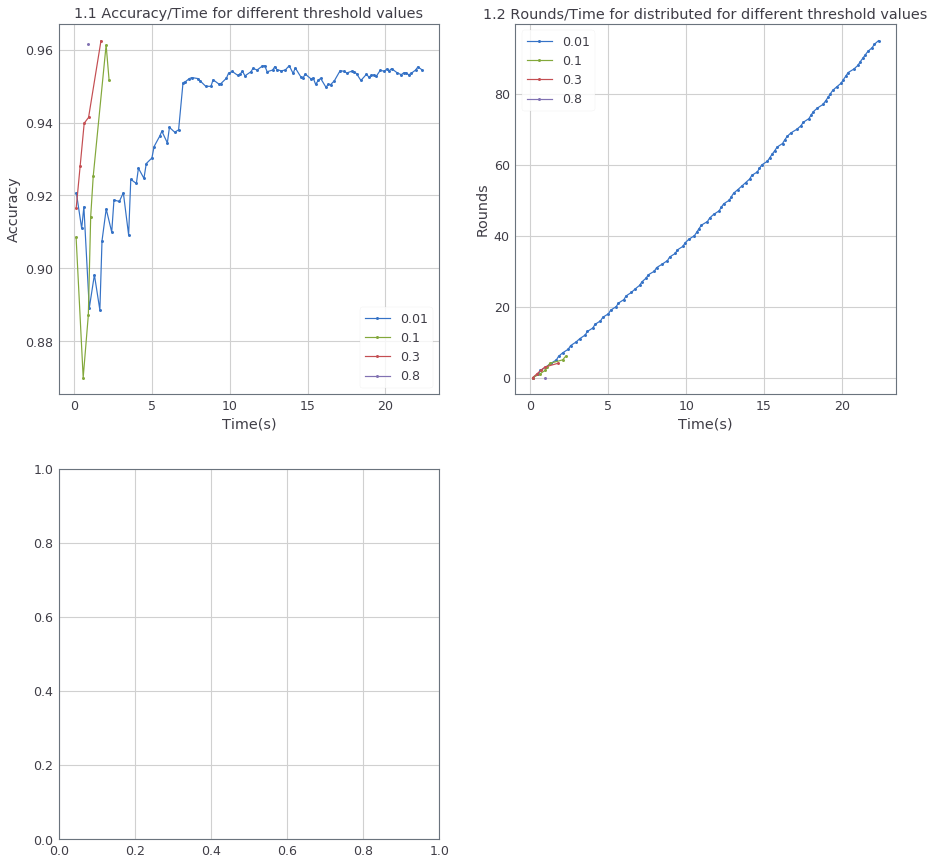

In [5]:
name="Plots/test2.png"
plot(t_list,Acc_real1,Acc_threshold,Rounds_threshold,Time_threshold,e_array,'centralized',name,'threshold')

In [ ]:
from IPython.display import Audio, display
display(Audio(url='http://peal.io/download/5e289.wav', autoplay=True))
# http://peal.io/download/mr5xx.wav

In [ ]:
# Acc_minibatch=[]
# Rounds_minibatch=[]
# Time_minibatch=[]
# e=0.2
# for i in minibatches :
#     minibatch=i
#     Acc,n_rounds,time_stamps=main(client,w,new,dataset_params,e,chunks,minibatch)
#     new="no"
#     Acc_minibatch.append(Acc)
#     Rounds_minibatch.append(n_rounds)
#     Time_minibatch.append(time_stamps)
#     time.sleep(5)

In [ ]:
# name="Plots/Minibatch_4x_w_"+str(len(w))+"_samples_"+str(dataset_params["n_samples"])+"_features_"+str(dataset_params["n_features"])+"_minib_"+str(minibatches)+".png"
# plot(l1,l2,Acc_minibatch,Rounds_minibatch,Time_minibatch,minibatches,labels,name,'minibatches')

### Save results

In [ ]:
# f = open("result.txt", "a")
# f.writelines(["\n\n==========================================================================="])
# f.writelines(["\nNEW EXPERIMENT:\nparams:",str(dataset_params),"\nminibaches_size:"
#               ,str(minibatches),"\ndifferent e's:",str(e_array),"\nn_workers: ",str(len(w))])
# f.writelines(["\n___________________________________________________________________________"])
# f.writelines(["\nRESULTS:\nAcc_threshold",str(Acc_threshold),"\nRounds_threshold",str(Rounds_threshold),
#              "\nTime_threshold",str(Time_threshold),"\nlen_real1",str(len_real1),"\nAcc_real1",str(Acc_real1)])
# f.close()

### Shutdown client

In [ ]:
client.close()
client.shutdown()